In [ ]:
  #Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score


In [ ]:
#Reading the file

diabetes_dataset=pd.read_csv('/content/diabetes.csv')

In [ ]:


diabetes_dataset['Outcome'].unique()

array([1, 0])

In [ ]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# To check if we have any values that are empty or missing
diabetes_dataset.isnull().values.any()

False

In [ ]:
# It tells us where the values are missing

diabetes_dataset.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
print(f'There are {diabetes_dataset.shape[0]} rows and {diabetes_dataset.shape[1]} columns in this data frame')



There are 768 rows and 9 columns in this data frame


In [ ]:
print(f"There are {diabetes_dataset['Pregnancies'].count()} diabetic pregnant diabetic patients, and from those there are {diabetes_dataset['Pregnancies'].value_counts().shape[0]} unique pregnant women of which is the max is 17 ")


There are 768 diabetic pregnant diabetic patients, and from those there are 17 unique pregnant women of which is the max is 17 


In [ ]:
columns = diabetes_dataset.keys()
columns  = list(columns)
print (columns)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [ ]:

from google.colab import data_table
data_table.enable_dataframe_formatter()
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


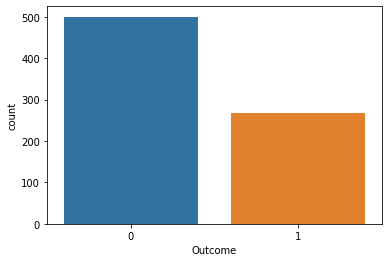

In [ ]:
sns.countplot(diabetes_dataset['Outcome'],label = 'count')

In [ ]:

diabetes_dataset.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# 0 represents non-diabetic and 1 represents diabetic
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# This gives the mean for the outcomes 0 and 1 which tells us on average thus; on average, people with glucose of around 110 tend to be non diabetic vs people that have 140 glucose.

diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
diabetes_dataset.iloc[:,:].corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


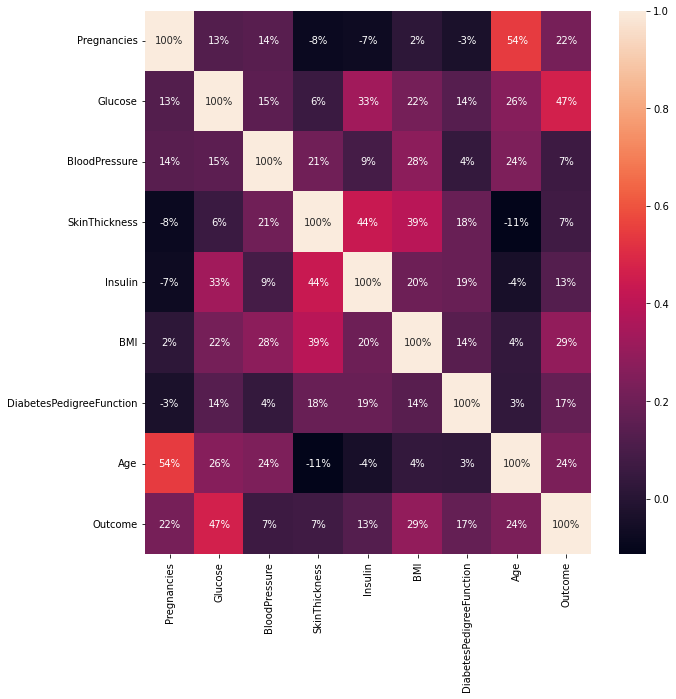

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(diabetes_dataset.iloc[:,:].corr(),annot=True, fmt='.0%')

In [ ]:
diabetes_dataset.style.background_gradient(cmap='Greens')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1
5,5,116,74,0,0,25.600000,0.201000,30,0
6,3,78,50,32,88,31.000000,0.248000,26,1
7,10,115,0,0,0,35.300000,0.134000,29,0
8,2,197,70,45,543,30.500000,0.158000,53,1
9,8,125,96,0,0,0.000000,0.232000,54,1


In [ ]:
# Separating the data and labels
# You must mention axis=1 if you are dropping a column and axis=0 if you are dropping a row
X = diabetes_dataset.drop(columns = 'Outcome', axis = 1)
Y = diabetes_dataset['Outcome']

In [ ]:
print (X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print (Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [ ]:
# We need to standardize the data because if the range difference of a particular parameter is very high, it becomes difficult for our AI to do predictions. 
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
X = standardized_data

Y = diabetes_dataset['Outcome']

In [ ]:
print (X, Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]] 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Training Data


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 40)

In [ ]:
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(614, 8) (154, 8) (614,) (154,)


**Creating the Model**

SVM - linear

In [ ]:
classifier = svm.SVC(kernel = 'linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [ ]:
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print(testing_data_accuracy)

0.7467532467532467


SVM - poly


In [ ]:
classifier2 = svm.SVC(kernel = 'poly')
classifier2.fit(X_train, Y_train)

SVC(kernel='poly')

In [ ]:
X_train_prediction = classifier2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

X_test_prediction = classifier2.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print(testing_data_accuracy)

0.7532467532467533


Decision Tree


In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
X_train_prediction = tree.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

X_test_prediction = tree.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print (X_test_accuracy)


0.7142857142857143


Logistic Regression

In [ ]:
log_reg = LogisticRegression(solver='liblinear', random_state = 42)
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
X_train_prediction = log_reg.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

X_test_prediction = log_reg.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print (testing_data_accuracy)

0.7727272727272727


Random Forest Classifier

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
X_train_prediction = RFC.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

X_test_prediction = RFC.predict(X_test)
testing_data_accuarcy = accuracy_score(X_test_prediction, Y_test)

print (testing_data_accuracy)

0.7727272727272727


Naive Bayes

In [ ]:
NB = GaussianNB()
NB.fit(X_train, Y_train)

GaussianNB()

In [ ]:
X_train_prediction = NB.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

X_test_prediction = NB.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print(testing_data_accuracy)

0.7337662337662337


K-Nearest Neighbour

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
X_train_prediction = knn.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

X_test_predictiton = knn.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print(testing_data_accuracy)

0.7272727272727273


**Comparing the models using train_test_split**


In [ ]:
models = [LogisticRegression(max_iter=1000), knn, RandomForestClassifier(),GaussianNB(),DecisionTreeClassifier(), classifier, classifier2]

In [ ]:
def compare_models_train_test():
  for model in models:

    model.fit(X_train, Y_train)
    test_data_prediction = model.predict(X_test)
    accuracy = accuracy_score(Y_test, test_data_prediction)
    print ('Accuracy score of the ', model, ' =', accuracy)

In [ ]:
compare_models_train_test()

Accuracy score of the  LogisticRegression(max_iter=1000)  = 0.7727272727272727
Accuracy score of the  KNeighborsClassifier()  = 0.7272727272727273
Accuracy score of the  RandomForestClassifier()  = 0.7337662337662337
Accuracy score of the  GaussianNB()  = 0.7337662337662337
Accuracy score of the  DecisionTreeClassifier()  = 0.7337662337662337
Accuracy score of the  SVC(kernel='poly')  = 0.7532467532467533
Accuracy score of the  SVC(kernel='poly')  = 0.7532467532467533


**Cross Validation**

Logistic Regression

In [ ]:
cross_val_LR = cross_val_score(LogisticRegression(max_iter = 1000), X, Y, cv = 5)

print (cross_val_LR)

mean_accuracy_LR = sum(cross_val_LR)/len(cross_val_LR)

mean_accuracy_LR = mean_accuracy_LR*100

mean_accuracy_LR = round(mean_accuracy_LR, 2)

print(mean_accuracy_LR)

[0.77272727 0.74675325 0.75324675 0.81699346 0.76470588]
77.09


SVM - linear

In [ ]:
cross_val_svmL = cross_val_score((classifier), X, Y, cv = 5)

print(cross_val_svmL)

mean_accuracy_svmL = sum(cross_val_svmL)/len(cross_val_svmL)

mean_accuracy_svmL = mean_accuracy_svmL*100

mean_accuracy_svmL = round(mean_accuracy_svmL, 2)

print (mean_accuracy_svmL)

[0.74025974 0.77272727 0.72077922 0.76470588 0.74509804]
74.87


SVM - poly

In [ ]:
cross_val_svmP = cross_val_score((classifier2), X, Y, cv = 5)

print (cross_val_svmP)

mean_accuracy_svmP = sum(cross_val_svmP)/len(cross_val_svmP)

mean_accuracy_svmP = mean_accuracy_svmP*100

mean_accuracy_svmP = round(mean_accuracy_svmP, 2)

print(mean_accuracy_svmP)

[0.74025974 0.77272727 0.72077922 0.76470588 0.74509804]
74.87


K-Nearest Neighbor

In [ ]:
cross_val_KNN = cross_val_score(KNeighborsClassifier(), X, Y, cv = 5)

print (cross_val_KNN)

mean_accuracy_KNN = sum(cross_val_KNN)/len(cross_val_KNN)

mean_accuracy_KNN = mean_accuracy_KNN*100

mean_accuracy_KNN = round(mean_accuracy_KNN, 2)

print (mean_accuracy_KNN)

[0.72077922 0.73376623 0.71428571 0.77124183 0.7254902 ]
73.31


Random Forest Classifier

In [ ]:
cross_val_rfc = cross_val_score(RandomForestClassifier(), X, Y, cv = 5)

print(cross_val_rfc)

mean_accuracy_rfc = sum(cross_val_rfc)/len(cross_val_rfc)

mean_accuracy_rfc = mean_accuracy_rfc*100

mean_accuracy_rfc = round(mean_accuracy_rfc, 2)

print(mean_accuracy_rfc)

[0.75974026 0.73376623 0.74025974 0.80392157 0.75163399]
75.79


Naive Bayes

In [ ]:
cross_val_nb = cross_val_score(GaussianNB(), X, Y, cv = 5)

print (cross_val_nb)

mean_accuracy_nb = sum(cross_val_nb)/len(cross_val_nb)

mean_accuracy_nb = mean_accuracy_nb*100

mean_accuracy_nb = round(mean_accuracy_nb, 2)

print(mean_accuracy_nb)

[0.75324675 0.72727273 0.74675325 0.78431373 0.74509804]
75.13


Decision Tree

In [ ]:
cross_val_dtc = cross_val_score(DecisionTreeClassifier(), X, Y, cv = 5)

print(cross_val_dtc)

mean_accuracy_dtc = sum(cross_val_dtc)/len(cross_val_dtc)

mean_accuracy_dtc = mean_accuracy_dtc*100

mean_accuracy_dtc = round(mean_accuracy_dtc, 2)

print(mean_accuracy_dtc)

[0.7012987  0.68181818 0.7012987  0.78431373 0.73202614]
72.02


**Comparing the models using cross validation**

In [ ]:
models = [LogisticRegression(max_iter=1000), knn, RandomForestClassifier(),GaussianNB(),DecisionTreeClassifier(), classifier, classifier2]

In [ ]:
def compare_models_cross_validation():
  for model in models:
    cv_score=cross_val_score(model, X, Y, cv = 5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross validation accuracies for', model,'= ' ,cv_score)
    print('Accuracy % of the', model, mean_accuracy)
    print('------------------------------------')


In [ ]:
compare_models_cross_validation()

Cross validation accuracies for LogisticRegression(max_iter=1000) =  [0.77272727 0.74675325 0.75324675 0.81699346 0.76470588]
Accuracy % of the LogisticRegression(max_iter=1000) 77.09
------------------------------------
Cross validation accuracies for KNeighborsClassifier() =  [0.72077922 0.73376623 0.71428571 0.77124183 0.7254902 ]
Accuracy % of the KNeighborsClassifier() 73.31
------------------------------------
Cross validation accuracies for RandomForestClassifier() =  [0.74675325 0.72727273 0.75974026 0.83660131 0.75163399]
Accuracy % of the RandomForestClassifier() 76.44
------------------------------------
Cross validation accuracies for GaussianNB() =  [0.75324675 0.72727273 0.74675325 0.78431373 0.74509804]
Accuracy % of the GaussianNB() 75.13
------------------------------------
Cross validation accuracies for DecisionTreeClassifier() =  [0.7012987  0.65584416 0.72077922 0.79084967 0.73856209]
Accuracy % of the DecisionTreeClassifier() 72.15
--------------------------------

Building the AI System


In [ ]:
input_data = (4, 110, 92, 0, 0, 37.6, 0.191, 30)
# Change the input data to a numpy array
np_array=np.asarray(input_data)

input_data_reshaped = np_array.reshape(1, -1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

#We can change to any algorithm here
prediction = log_reg.predict(std_data)
print(prediction)

if (prediction[0]==0):
  print ('This person is not diabetic')
else:
    print ('This person is diabetic')


[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
This person is not diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
